# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***.

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [1]:
import pandas as pd

# Run this cell if you
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cleaned_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

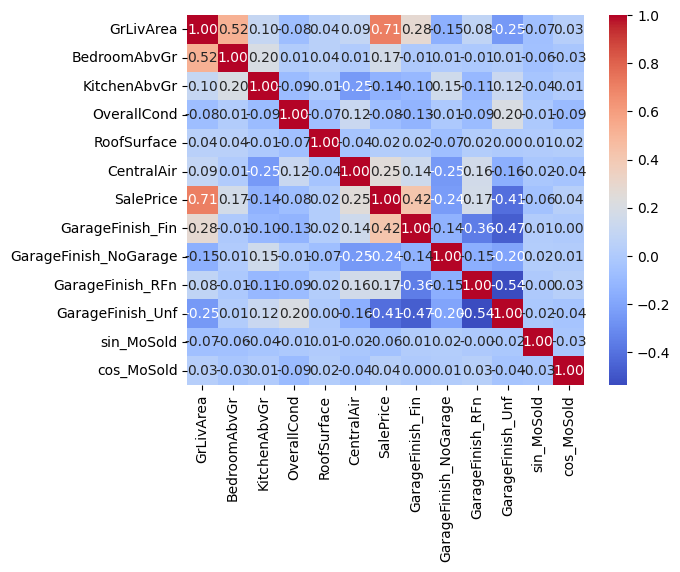

In [3]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot = True, fmt='.2f')

❓ Visualize the correlation between column pairs in a dataframe ❓

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

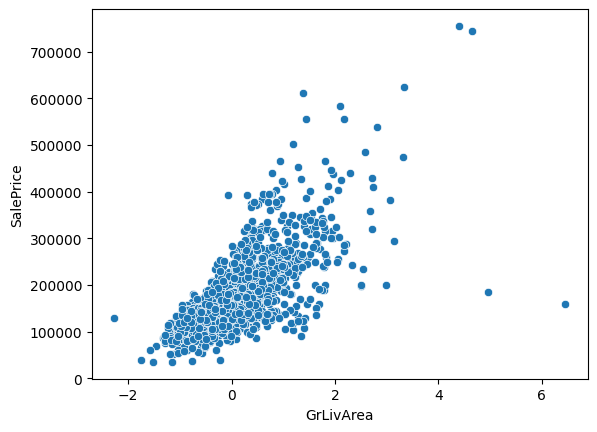

In [4]:
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='RoofSurface', ylabel='SalePrice'>

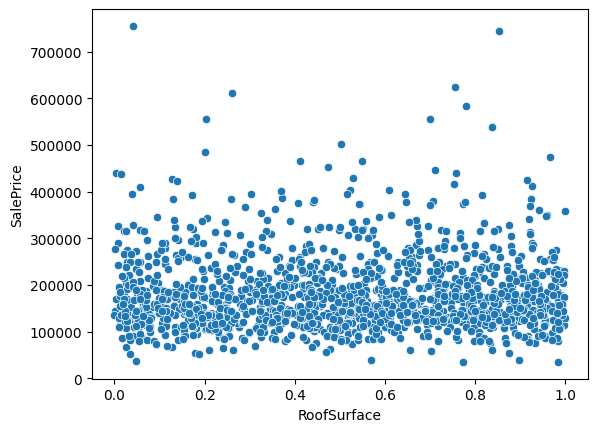

In [5]:
sns.scatterplot(data=data, x='RoofSurface', y='SalePrice')

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

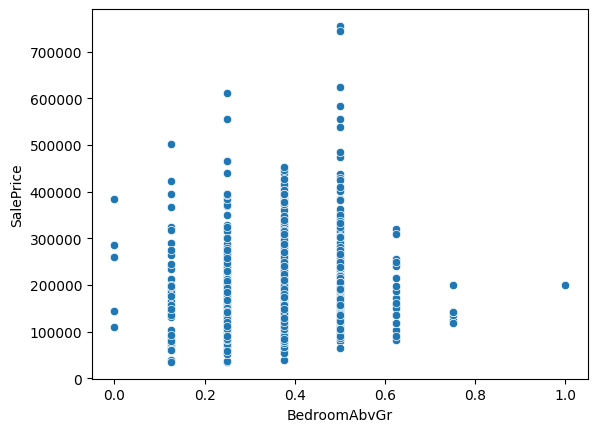

In [6]:
sns.scatterplot(data=data, x='BedroomAbvGr', y='SalePrice')

❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [7]:
correlated_features = 0

🧪 **Test your code**

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [9]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice'] 

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [11]:
model = LinearRegression()
base_model_score = cross_val_score(model, X, y, cv=5).mean()
base_model_score

0.641914406699805

🧪 **Test your code**

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [13]:
from sklearn.inspection import permutation_importance

In [14]:
model = LinearRegression().fit(X, y)
permutation_score = permutation_importance(model, X, y, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'score decrease': permutation_score.importances_mean
})
importance_df = importance_df.sort_values(by="score decrease", ascending=False)
importance_df

,feature,score decrease
0,GrLivArea,1.006039
1,BedroomAbvGr,0.062162
6,GarageFinish_Fin,0.051204
9,GarageFinish_Unf,0.020919
2,KitchenAbvGr,0.019679
5,CentralAir,0.016060
8,GarageFinish_RFn,0.012204
7,GarageFinish_NoGarage,0.011292
10,sin_MoSold,0.001001
3,OverallCond,0.000256


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [15]:
best_feature = 'GrLivArea'
best_feature

'GrLivArea'

🧪 **Test your code**

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one.
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [17]:
X_temp = X.copy()

In [18]:
X_temp = X_temp.drop(columns=['cos_MoSold'])
model = LinearRegression()
score_cos_MoSold = cross_val_score(model, X_temp, y, cv=5).mean()
score_cos_MoSold

0.6418987782970069

In [19]:
X_temp = X_temp.drop(columns=['RoofSurface'])
model = LinearRegression()
score_RoofSurface = cross_val_score(model, X_temp, y, cv=5).mean()
score_RoofSurface

0.6421270149538474

In [20]:
X_temp = X_temp.drop(columns=['OverallCond'])
model = LinearRegression()
score_OverallCond = cross_val_score(model, X_temp, y, cv=5).mean()
score_OverallCond

0.6428520822976337

In [21]:
X_temp = X_temp.drop(columns=['sin_MoSold'])
model = LinearRegression()
score_sin_MoSold = cross_val_score(model, X_temp, y, cv=5).mean()
score_sin_MoSold

0.643356709312639

In [22]:
X_temp = X_temp.drop(columns=['GarageFinish_NoGarage'])
model = LinearRegression()
score_GarageFinish_NoGarage = cross_val_score(model, X_temp, y, cv=5).mean()
score_GarageFinish_NoGarage

0.643356709312639

In [23]:
X_temp = X_temp.drop(columns=['GarageFinish_RFn'])
model = LinearRegression()
score_GarageFinish_RFn = cross_val_score(model, X_temp, y, cv=5).mean()
score_GarageFinish_RFn

0.633227441016929

In [25]:
X_temp = X_temp.drop(columns=['CentralAir'])
model = LinearRegression()
score_CentralAir = cross_val_score(model, X_temp, y, cv=5).mean()
score_CentralAir

0.6200873688585565

In [26]:
X_temp = X_temp.drop(columns=['KitchenAbvGr'])
model = LinearRegression()
score_KitchenAbvGr = cross_val_score(model, X_temp, y, cv=5).mean()
score_KitchenAbvGr

0.6008773582853447

In [27]:
features_to_remove = ['cos_MoSold', 'RoofSurface', 'OverallCond', 'sin_MoSold', 'GarageFinish_NoGarage', 'GarageFinish_RFn']
X_simplified = X.drop(columns=features_to_remove)
model = LinearRegression()
simplified_model_score = cross_val_score(model, X_simplified, y, cv=5).mean()
simplified_model_score

0.633227441016929

🧪 **Test your code**

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

0.5726603017210607

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!